In [1]:
import matplotlib.pyplot as plt 
import numpy as np

Using the series Taylor expansion with $f(x_0+\Delta x)$ we have that the second derivate can be expressed as: 
$$f''_1(x_0) = \frac{2(f(x_0+\Delta x)-f(x_0)-f'(x_0)\Delta x)}{(\Delta x)^2}$$
similarly, with the expansion of $f(x_0-\Delta x)$ we have:
$$f''_2(x_0) = \frac{2(f(x_0+\Delta x)-f(x_0)+f'(x_0)\Delta x)}{(\Delta x)^2}$$
and later if we sustract $f''_1(x_0)$ and $f''_2(x_0)$, we obtain the difference aproximation of this two second order derivates:
$$f''_1(x_0)-f''_2(x_0) = -\frac{4f'(x_0)}{\Delta x}$$
$$|f''_1(x_0)-f''_2(x_0)| = \frac{4f'(x_0)}{\Delta x}$$
ideal result is when this sustract is equal to zero, i.e, when $f'(x_0)\rightarrow0$.

In [2]:
def f(x,s,m):
     return np.exp(-0.5*((x-m)/s)**2.0)/(np.sqrt(2*np.pi)*s)

In [3]:
def Derivative(x,h,s,m,forward=False,backward=False,central=False):
    if forward:
        return (f(x+h,s,m)-f(x,s,m))/h
    if backward:
        return (f(x,s,m)-f(x-h,s,m))/h
    if central:
        return (f(x+h,s,m)-f(x-h,s,m))/(2*h)

In [4]:
def second_Derivative(x,h,s,m,forward=False,backward=False,central=False):
    if forward:
        return (f(x+h,s,m)-f(x,s,m)-Derivative(x,h,s,m,forward=forward,backward=backward,central=central)*h)/(0.5*h**2.0)
    if backward:
        return ((x,s,m)-f(x-h,s,m)+Derivative(x,h,s,m,forward=forward,backward=backward,central=central)*h)/(0.5*h**2.0)
    # NOT WORK GOOD, BETTER THE FOLLOWING DEFINITION 

In [5]:
def second_Derivative(x,h,s,m,derivative,forward=False,backward=False):
    if forward:
        return (f(x+h,s,m)-f(x,s,m)-derivative*h)/(0.5*h**2.0)
    if backward:
        return (f(x,s,m)-f(x-h,s,m)+derivative*h)/(0.5*h**2.0)

In [6]:
s = 2.0
m = 1.5
N = 1000
a = -10.0*s+m
b = 10.0*s+m
h = (b-a)/N
x = np.linspace(a,b,N)
func = f(x,s,m)
deriv = Derivative(x,h,s,m,central=True)
second_deriv = second_Derivative(x,h,s,m,deriv,forward=True)

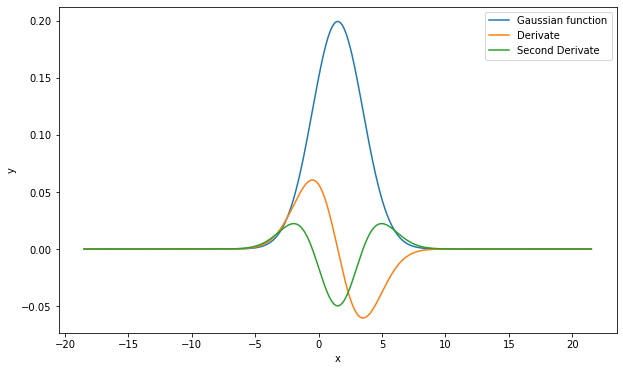

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x,func,label='Gaussian function')
plt.plot(x,deriv,label='Derivate')
plt.plot(x,second_deriv,label='Second Derivate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# The order of approximation of this methid is third order.